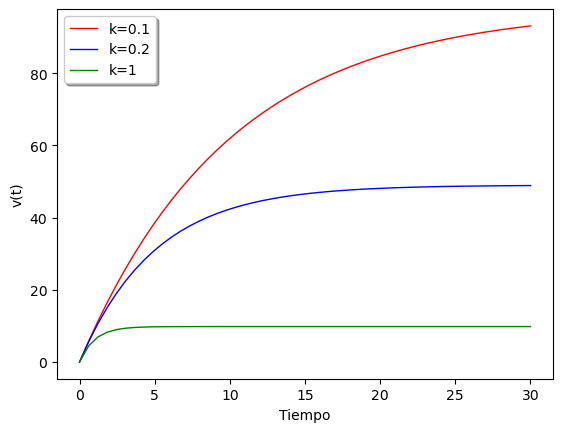

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

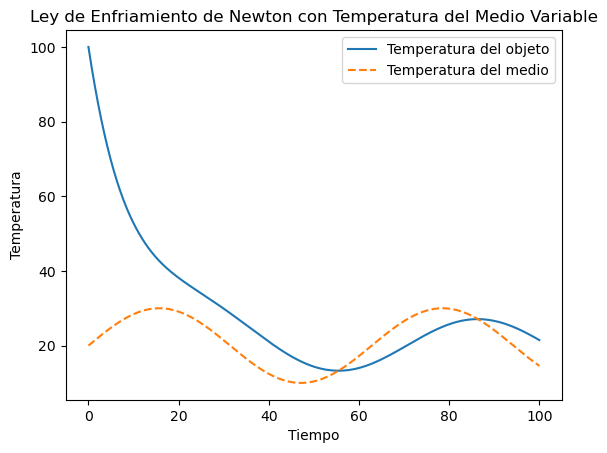

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

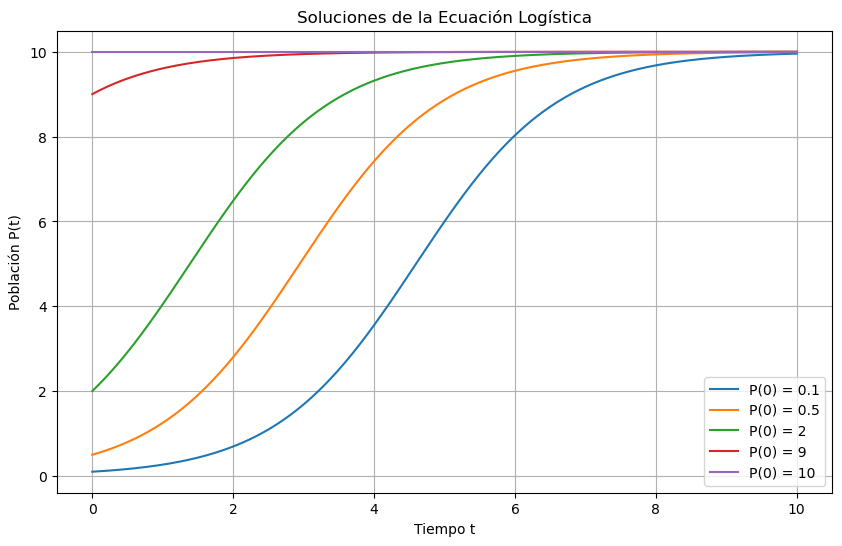

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros de la ecuación
a = 1.0  # Tasa de crecimiento
b = 0.1  # Tasa de competencia

# Ecuación diferencial logística
def logistica_ec(P, t):
    return a * P - b * P**2

# Tiempo para la integración
t = np.linspace(0, 10, 400)

# Condiciones iniciales diferentes
P0_vals = [0.1, 0.5, 2, 9, 10]

# Soluciones para cada condición inicial
sols = [odeint(logistica_ec, P0, t) for P0 in P0_vals]

# Graficar el las soluciones
plt.figure(figsize=(10, 6))
for i, P0 in enumerate(P0_vals):
    plt.plot(t, sols[i], label=f'P(0) = {P0}')
plt.xlabel('Tiempo t')
plt.ylabel('Población P(t)')
plt.title('Soluciones de la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y)

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()

# Widgets interactivos
a_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='b:')
c_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='c:')
d_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='d:')
n_slider = widgets.IntSlider(value=20, min=10, max=50, step=1, description='n:')
x0_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='x0:')
y0_slider = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='y0:')

interactive_plot = interactive(plot_slope_field, a=a_slider, b=b_slider, c=c_slider, d=d_slider, n=n_slider, x0=x0_slider, y0=y0_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=-5.0, description='a:', max=0.0, min=-10.0), FloatSlider(value=5.0, de…

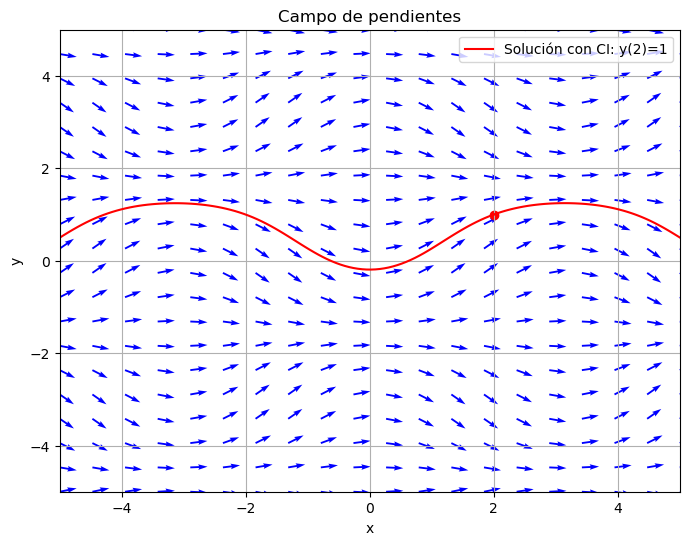

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y) #Se puede cambiar arbitrariamente

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a, b, c, d, n, x0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy", color="b")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()
plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=2, y0=1)

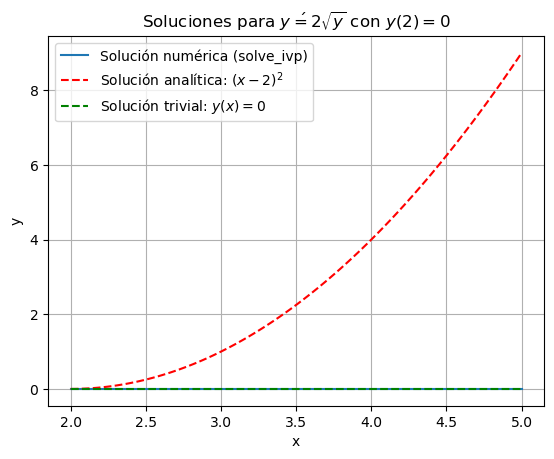

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos la función f(x, y)
def f(x, y):
    return 2 * np.sqrt(y)

# Condiciones iniciales
x0 = 2
y0 = 0

# Intervalo de integración
x_span = [x0, 5]

# Resolver la EDO usando solve_ivp
sol = solve_ivp(f, x_span, [y0], method='RK45', t_eval=np.linspace(x0, 5, 100))

# Solución analítica: y(x) = (x - 2)^2
x = np.linspace(2, 5, 100)
y_analitica = (x - 2)**2

# Solución trivial: y(x) = 0
y_trivial = np.zeros_like(x)

# Visualizar las soluciones
plt.plot(sol.t, sol.y[0], label='Solución numérica (solve_ivp)')
plt.plot(x, y_analitica, 'r--', label='Solución analítica: $(x-2)^2$')
plt.plot(x, y_trivial, 'g--', label='Solución trivial: $y(x) = 0$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Soluciones para $y\' = 2\sqrt{y}$ con $y(2) = 0$')
plt.legend()
plt.grid(True)
plt.show()

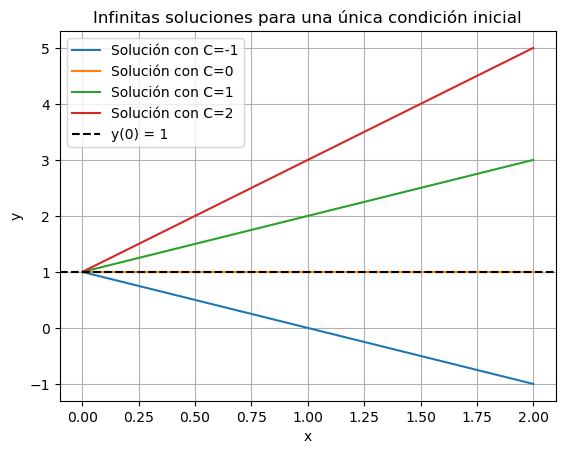

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y)
def f(x, y):
    # Evitamos la división por cero para x = 0
    return np.divide(y-1, x, out=np.zeros_like(x), where=x!=0)

# Condiciones iniciales
x0 = 0
y0 = 1

# Intervalo de integración
x = np.linspace(x0, 2, 100)

# Soluciones para diferentes valores de C
C_vals = [-1, 0, 1, 2]
sols = [1+C * x for C in C_vals]

# Visualizar las soluciones
for i, y_sol in enumerate(sols):
    plt.plot(x, y_sol, label=f'Solución con C={C_vals[i]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Infinitas soluciones para una única condición inicial')
plt.axhline(1, color='black', linestyle='--', label='y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()


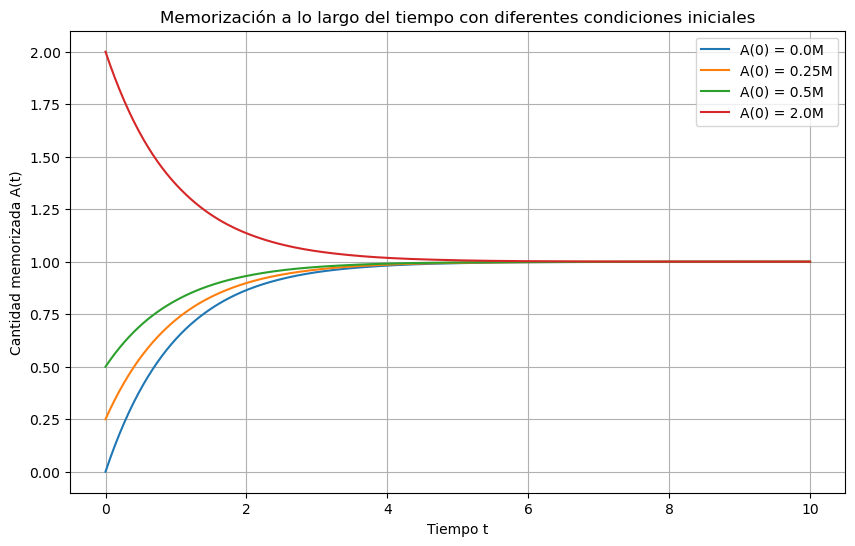

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
# Cantidad total a memorizar
M = 1 
# Valor fijo de la constante de proporcionalidad
k = 1  

# Diferentes condiciones iniciales
A0_values = [0*M, 0.25*M, 0.5*M, 2*M]

# Definición de la ecuación diferencial
def dA_dt(t, A, k):
    return k*(M-A)

# Tiempo de integración
t_eval = np.linspace(0, 10, 300)

# Resolver y graficar para diferentes condiciones iniciales
plt.figure(figsize=(10, 6))

for A0 in A0_values:
    sol = solve_ivp(dA_dt, [0, 10], [A0], args=(k,), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'A(0) = {A0/M}M')

# Configuración del gráfico
plt.title('Memorización a lo largo del tiempo con diferentes condiciones iniciales')
plt.xlabel('Tiempo t')
plt.ylabel('Cantidad memorizada A(t)')
plt.legend()
plt.grid(True)
plt.show()


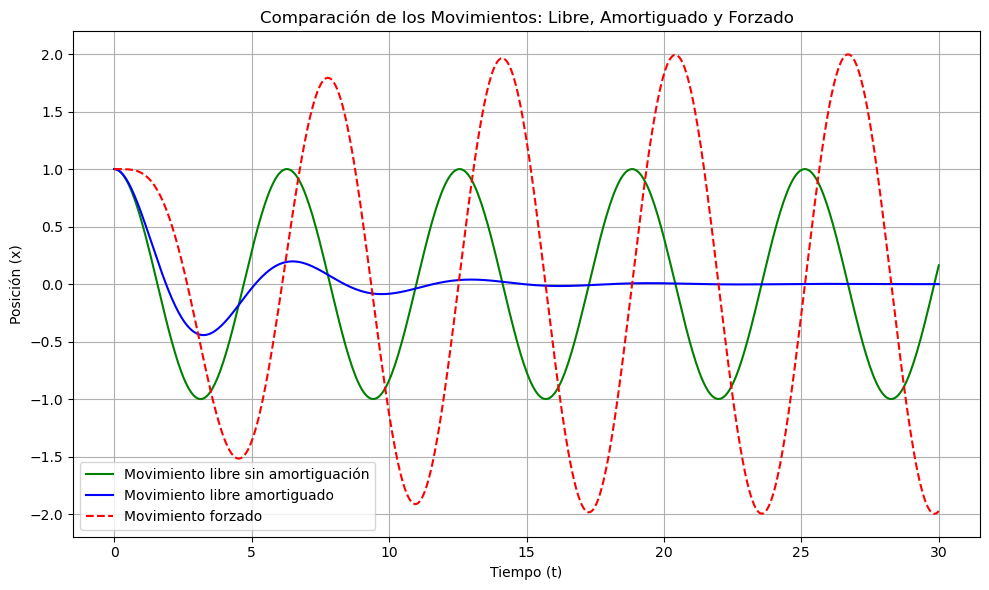

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0   # masa
k = 1.0   # constante del resorte
beta = 0.5   # coeficiente de amortiguamiento
F0 = 1  # amplitud de la fuerza externa (puede ser 0 si no hay fuerza externa)
gamma = 1.0  # frecuencia de la fuerza externa

# Definir el sistema de ecuaciones diferenciales: Una EDO de 2do orden se "separa" como un sistema para aplicar el
#el comando solve_ivp
def masa_resorte(t, y, m, k, beta, F0, gamma):
    x, v = y
    dxdt = v
    dvdt = -(k/m) * x - (beta/m) * v + (F0/m) * np.cos(gamma * t) #Fuerza externa F0*cos(gamma*t): se puede cambiar
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [1.0, 0.0]  # posición inicial x(0)=1, velocidad inicial x'(0)=0

# Tiempo de simulación
t_span = (0, 30)
t_eval = np.linspace(*t_span, 500)

# Resolver las ecuaciones diferenciales para los tres casos
sol_libre_sin_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, 0, 0, 0), t_eval=t_eval)
sol_libre_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, 0, 0), t_eval=t_eval)
sol_forzado = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, F0, gamma), t_eval=t_eval)

# Graficar los resultados en un mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(sol_libre_sin_amort.t, sol_libre_sin_amort.y[0], label='Movimiento libre sin amortiguación', color='green')
plt.plot(sol_libre_amort.t, sol_libre_amort.y[0], label='Movimiento libre amortiguado', color='blue')
plt.plot(sol_forzado.t, sol_forzado.y[0], label='Movimiento forzado', linestyle='dashed', color='red')

plt.title('Comparación de los Movimientos: Libre, Amortiguado y Forzado')
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import sympy as sp

# Definir la variable independiente y la función dependiente
t = sp.Symbol('t')
y = sp.Function('y')(t)

# Definir la ecuación diferencial no homogénea
edo_no_homogenea = sp.Eq(2*y.diff(t, 2) - 3*y.diff(t) + 4*y, 0)

# Resolver la ecuación diferencial no homogénea
solucion_no_homogenea = sp.dsolve(edo_no_homogenea)

# # Mostrar la solución general
print("Solución de la EDO no homogénea:")
display(solucion_no_homogenea)

Solución de la EDO no homogénea:


Eq(y(t), (C1*sin(sqrt(23)*t/4) + C2*cos(sqrt(23)*t/4))*exp(3*t/4))

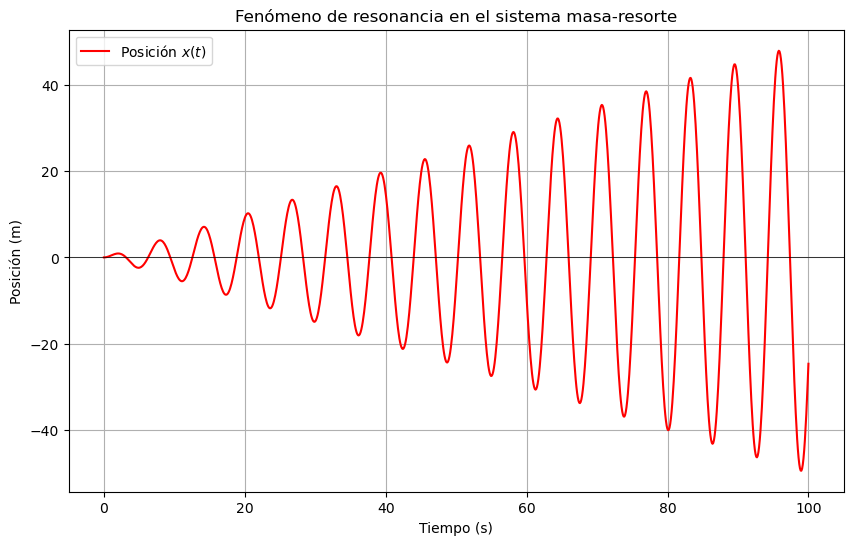

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0       # masa (kg)
k = 1.0       # constante del resorte (N/m)
beta = 0      # coeficiente de amortiguamiento (kg/s)
F0 = 1.0      # amplitud de la fuerza externa (N)
gamma = 1.0  # frecuencia de la fuerza externa (rad/s)

# Frecuencia natural del sistema
omega = np.sqrt(k / m)

# Definimos el sistema de ecuaciones diferenciales
def sistema_masa_resorte(t, y):
    x, v = y  # y = [x, v], donde x es la posición y v la velocidad
    dxdt = v
    dvdt = (F0 * np.cos(gamma * t) - beta * v - k * x) / m
    return [dxdt, dvdt]

# Condiciones iniciales
x0 = 0.0  # Posición inicial (m)
v0 = 0.0  # Velocidad inicial (m/s)
y0 = [x0, v0]

# Tiempo de simulación
t_span = (0, 100)  # Tiempo desde 0 hasta 100 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de evaluación

# Resolver la EDO
sol = solve_ivp(sistema_masa_resorte, t_span, y0, t_eval=t_eval)

# Extraer la solución
t = sol.t
x = sol.y[0]  # Posición de la masa

# Graficar la posición en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Posición $x(t)$', color='r')
plt.axhline(0, color='k',linewidth=0.5)
plt.title('Fenómeno de resonancia en el sistema masa-resorte')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from sympy import symbols, diff, exp

# Definir la variable independiente y las funciones
x = symbols('x')
y1 = exp(x)
y2 = x* exp(x)

# Definir la ecuación diferencial
def check_solucion(y):
    # Derivadas
    y_primera = diff(y, x)
    y_segunda = diff(y_primera, x)
    
    # Sustituir en la ecuación diferencial y'' - 2y' + y = 0
    return y_segunda - 2*y_primera + y

# Modificar la función para que devuelva una respuesta clara
def check_solucion_verbal(y, label):
    result = check_solucion(y)
    if result == 0:
        return f"{label} es solución."
    else:
        return f"{label} no es solución."

# Verificar si y1 y y2 son soluciones
check_y1_verbal = check_solucion_verbal(y1, "y1(x) = e^x")
check_y2_verbal = check_solucion_verbal(y2, "y2(x) = xe^x")

check_y1_verbal, check_y2_verbal

('y1(x) = e^x es solución.', 'y2(x) = xe^x es solución.')

In [14]:
import sympy as sp

# Definir la variable simbólica
x = sp.symbols('x')

# Definir las funciones
f1 = sp.sin(2*x)
f2 = sp.sin(x)*sp.cos(x)

# Calcular las derivadas
f1_deriv = sp.diff(f1, x)
f2_deriv = sp.diff(f2, x)

# Crear la matriz de Wronskiano
wronskiano = sp.Matrix([[f1, f2], [f1_deriv, f2_deriv]])

# Calcular el determinante del Wronskiano
det_wronskiano = wronskiano.det()

# Simplificar el determinante
det_simplificado = sp.simplify(det_wronskiano)

# Mostrar el resultado
f"El wronskiano es {det_simplificado}"

'El wronskiano es 0'

In [15]:
import sympy as sp

# Definimos la variable independiente
x = sp.symbols('x')

# Definimos P(x) y y1(x)
P = -(x+2)/x
y1 = x

# Calculamos y2(x) con la fórmula de Abel
exp_integral = sp.exp(-sp.integrate(P, x))  # e^(-∫P(x)dx)
integral = sp.integrate(exp_integral / y1**2, x)  # ∫(e^(-∫P(x)dx) / y1^2)dx
y2 = y1 * integral  # y2(x)

# Simplificamos el resultado
y2_simple = sp.simplify(y2)

# Mostrar el resultado
y2_simple

x*exp(x)

Solución homogénea:



Solución particular:


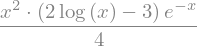


Solución general (completa):


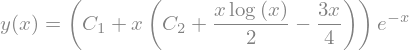

In [16]:
import sympy as sp

# Activar impresión bonita
sp.init_printing()

# Definir las variables y la función dependiente
x = sp.symbols('x')
y = sp.Function('y')(x)

# Definir la ecuación diferencial
eq = sp.Eq(y.diff(x, 2) + 2*y.diff(x) + y, sp.exp(-x) * sp.ln(x))

# Resolver la ecuación homogénea asociada
eq_homogenea = sp.Eq(y.diff(x, 2) + 2*y.diff(x) + y, 0)
sol_homogenea = sp.dsolve(eq_homogenea, y)

# Imprimir la solución homogénea
print("Solución homogénea:")
display(sol_homogenea)

# Resolver la ecuación completa
sol_completa = sp.dsolve(eq, y)

# Separar la solución homogénea de la particular
sol_particular = sp.simplify(sol_completa.rhs - sol_homogenea.rhs)

# Mostrar la solución particular y completa
print("\nSolución particular:")
display(sol_particular)

print("\nSolución general (completa):")
display(sol_completa)

Solución x1(t) y x2(t):


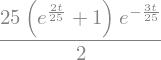

In [17]:
import numpy as np
from sympy import Matrix, Rational, symbols, exp, simplify
import sympy as sp

# Activar impresión bonita
sp.init_printing()

# Definir la matriz A usando fracciones exactas ## SE PUEDE MODIFICAR
A = Matrix([[Rational(-2, 25), Rational(1, 50)],
            [Rational(2, 25), Rational(-2, 25)]])

# Calcular los vectores y valores propios con fracciones
val_propios = A.eigenvals()  # Valores propios
vec_propios = A.eigenvects()  # Vectores propios

# Extraer los valores y vectores propios en listas asegurando el orden correcto
val_propios_lista = []
vectores_propios_lista = []

for val_propios, mult, vectores in vec_propios:
    val_propios_lista.append(val_propios)
    vectores_propios_lista.append(vectores[0])  # Cada valor propio puede tener múltiples vectores asociados, elegimos el primero

# Asignar los vectores propios en el orden de los valores propios
v1 = vectores_propios_lista[0]  # Primer vector propio
v2 = vectores_propios_lista[1]  # Segundo vector propio

# Condiciones iniciales ## SE PUEDE MODIFICAR
x0 = Matrix([25, 0])

# Resolver para las constantes c1 y c2 usando SymPy
C = Matrix([[v1[0], v2[0]],
            [v1[1], v2[1]]]).inv() * x0

# Expresiones de x1(t) y x2(t)
t = symbols('t')

def x1(t):
    return simplify(C[0] * v1[0] * exp(val_propios_lista[0] * t) + C[1] * v2[0] * exp(val_propios_lista[1] * t))

def x2(t):
    return simplify(C[0] * v1[1] * exp(val_propios_lista[0] * t) + C[1] * v2[1] * exp(val_propios_lista[1] * t))

# Expresión general para x1(t) y x2(t) en formato más legible
x1_exp = x1(t)
x2_exp = x2(t)

# Imprimir las expresiones en un formato más adecuado
print("Solución x1(t) y x2(t):")
display(x1_exp)
display(x2_exp)

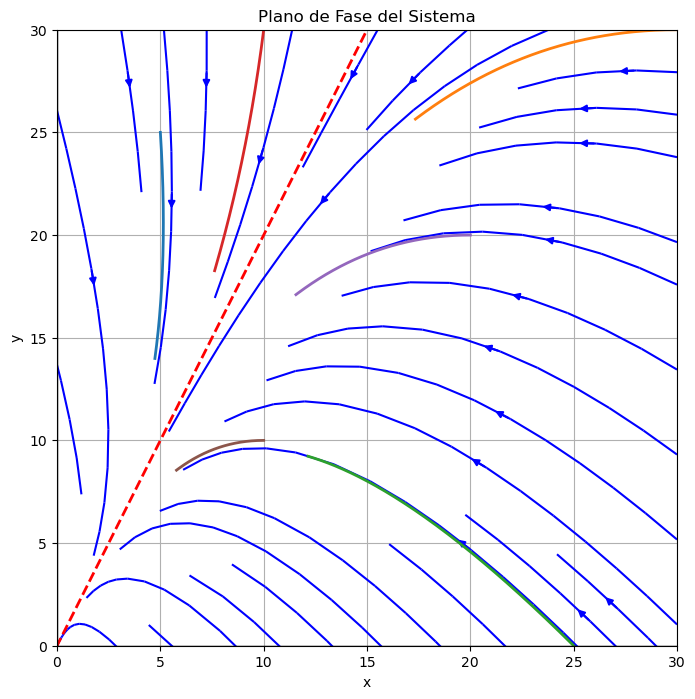

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la matriz del sistema
A = np.array([[-2/25, 1/50],
              [2/25, -2/25]])

# Calcular los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

# Crear un grid de puntos
x = np.linspace(-30, 30, 10)
y = np.linspace(-30, 30, 10)
X, Y = np.meshgrid(x, y)

# Definir las ecuaciones diferenciales del sistema
U = (-2/25) * X + (1/50) * Y
V = (2/25) * X + (-2/25) * Y

# Configurar la gráfica del plano de fase
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, U, V, color='b')  # Graficar el campo vectorial

# Condiciones iniciales para diferentes trayectorias
initial_conditions = [(5, 25), (30, 30), (25, 0), (10, 30), (20, 20), (10, 10)]

t = np.linspace(0, 10, 200)

# Definimos el sistema de ecuaciones diferenciales
def system(X, t):
    x, y = X
    dxdt = (-2/25)*x + (1/50)*y
    dydt = (2/25)*x + (-2/25)*y
    return [dxdt, dydt]

# Graficamos las trayectorias continuas
for ic in initial_conditions:
    traj = odeint(system, ic, t)
    plt.plot(traj[:, 0], traj[:, 1], lw=2)

# Graficar los ejes formados por los vectores propios. Se multiplica por +-40 para mejor visualización
for eigenvector in eigenvectors.T:
    plt.plot([-40*eigenvector[0], 40*eigenvector[0]],
             [-40*eigenvector[1], 40*eigenvector[1]], 'r--', lw=2)

# Añadir detalles a la gráfica
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Plano de Fase del Sistema')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

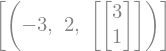

In [19]:
from sympy import Matrix, Rational
import sympy as sp

# Activar impresión bonita
sp.init_printing()

# Definir la matriz A usando fracciones exactas ## SE PUEDE MODIFICAR
A = Matrix([[Rational(3,1), Rational(-18,1)],
            [Rational(2, 1), Rational(-9, 1)]])

# Calcular los vectores y valores propios con fracciones
val_propios = A.eigenvals()  # Valores propios
vec_propios = A.eigenvects()  # Vectores propios

vec_propios #El output tiene el siguiente orden: valor propio, multiplicidad, vector propio

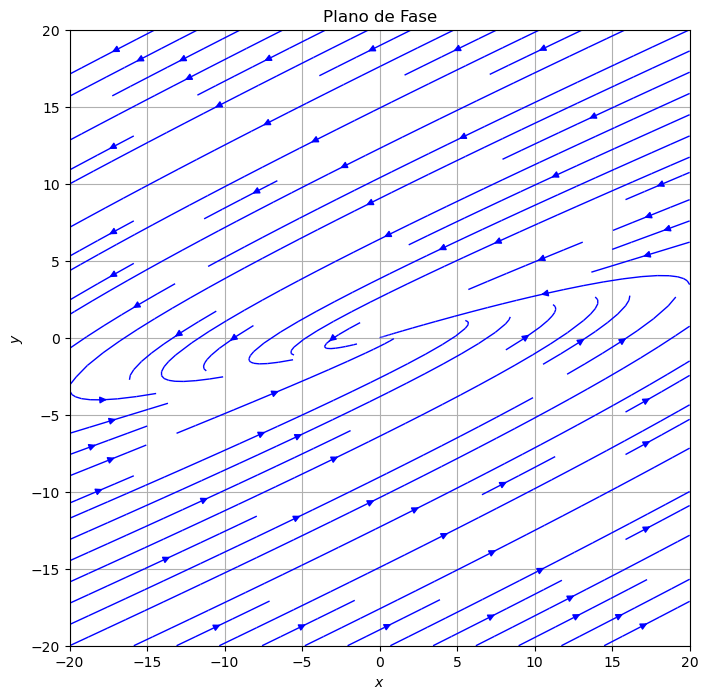

In [20]:
import numpy as np
import pylab as plt

# Definimos el sistema de ecuaciones diferenciales
def system(X, t):
    x, y = X
    dxdt = 3*x -18*y
    dydt = 2*x -9*y
    return [dxdt, dydt]

# Definimos el espacio de puntos para las condiciones iniciales
x_vals = np.linspace(-20, 20, 20)
y_vals = np.linspace(-20, 20, 20)

# Creamos una malla de puntos
X, Y = np.meshgrid(x_vals, y_vals)

# Calculamos las derivadas para cada punto de la malla
u = 3*X -18*Y
v = 2*X -9*Y

# Graficamos el campo vectorial usando streamplot
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, u, v, color='b', linewidth=1)

# Etiquetas de los ejes
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plano de Fase')

# Ajustamos los límites del gráfico
plt.xlim([-20, 20])
plt.ylim([-20, 20])

# Mostramos el gráfico
plt.grid()
plt.show()

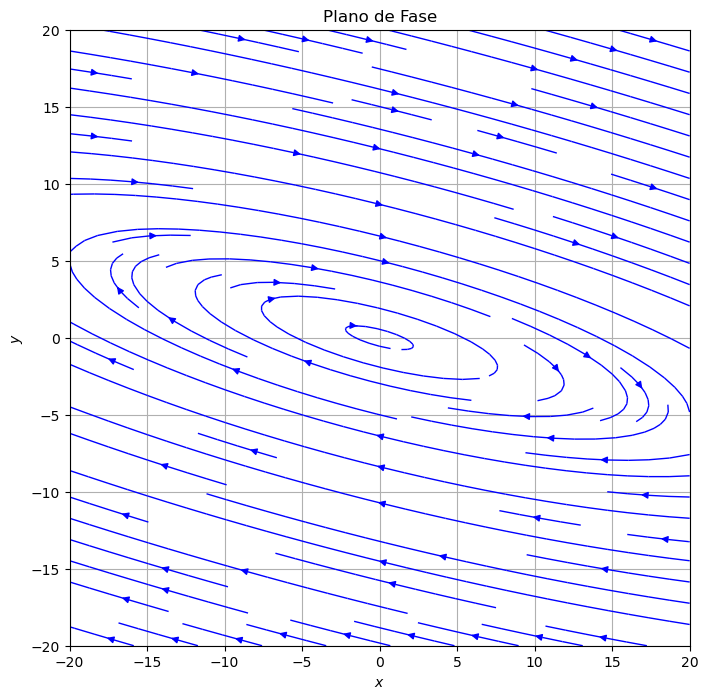

In [21]:
import numpy as np
import pylab as plt

# Definimos el sistema de ecuaciones diferenciales
def system(X, t):
    x, y = X
    dxdt = 2*x +8*y
    dydt = -1*x -2*y
    return [dxdt, dydt]

# Definimos el espacio de puntos para las condiciones iniciales
x_vals = np.linspace(-20, 20, 20)
y_vals = np.linspace(-20, 20, 20)

# Creamos una malla de puntos
X, Y = np.meshgrid(x_vals, y_vals)

# Calculamos las derivadas para cada punto de la malla
u = 2*X +8*Y
v = -1*X -2*Y

# Graficamos el campo vectorial usando streamplot
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, u, v, color='b', linewidth=1)

# Etiquetas de los ejes
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plano de Fase')

# Ajustamos los límites del gráfico
plt.xlim([-20, 20])
plt.ylim([-20, 20])

# Mostramos el gráfico
plt.grid()
plt.show()

In [22]:
from sympy import symbols, Eq, solve

# Definimos las variables simbólicas
x, y = symbols('x y')

# Definimos las ecuaciones del sistema
eq1 = Eq(-(x - y) * (1 - x - y), 0)  # x' = 0
eq2 = Eq(x * (2 + y), 0)             # y' = 0

# Resolvemos el sistema de ecuaciones
puntos_criticos = solve([eq1, eq2], (x, y))
puntos_criticos

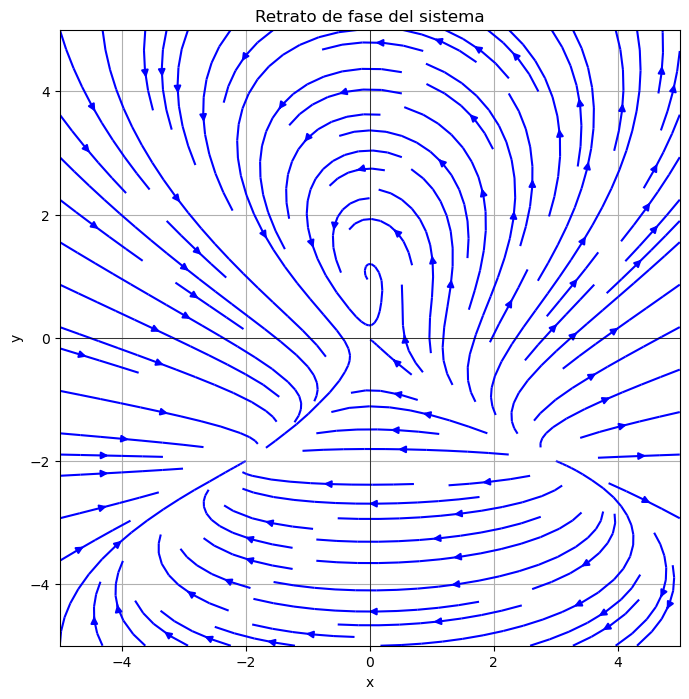

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones del sistema de ecuaciones diferenciales
def dx_dt(x, y):
    return -(x - y) * (1 - x - y)

def dy_dt(x, y):
    return x * (2 + y)

# Definimos el rango de valores para x e y
x_values = np.linspace(-5, 5, 20)
y_values = np.linspace(-5, 5, 20)

# Creamos una malla de puntos
X, Y = np.meshgrid(x_values, y_values)

# Calculamos los valores del campo vectorial
U = dx_dt(X, Y)
V = dy_dt(X, Y)

# Graficamos el plano de fase
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, U, V, color='b')
plt.title("Retrato de fase del sistema")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.show()

In [24]:
import sympy as sp

# Definir la variable simbólica 't' (tiempo) y 's' (frecuencia en el dominio de Laplace), a constante
t, s, a= sp.symbols('t s a')

# Definir algunas funciones simbólicas en el tiempo
f1 = sp.exp(a*t)  # Función exponencial

# Calcular las transformadas de Laplace
laplace_f1 = sp.laplace_transform(f1, t, s)

# Mostrar los resultados
print(f"Transformada de Laplace de exp(at): {laplace_f1[0]}")

Transformada de Laplace de exp(at): 1/(-a + s)


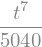

In [25]:
from sympy import *
from sympy.printing.latex import LatexPrinter

class MyLatexPrinter(LatexPrinter):
    def _print_Heaviside(self, expr, exp=None):
        pargs = ', '.join(self._print(arg) for arg in expr.pargs)
        tex = r"u\left(%s\right)" % pargs
        if exp:
            tex = r"\left(%s\right)^{%s}" % (tex, exp)
        return tex

def my_latex(expr, **settings):
    return MyLatexPrinter(settings).doprint(expr)

init_printing(latex_printer=my_latex)

var("s, t",positive=True)
expr = 1 / s**8
inv_lap = inverse_laplace_transform(expr, s, t)
display(inv_lap)

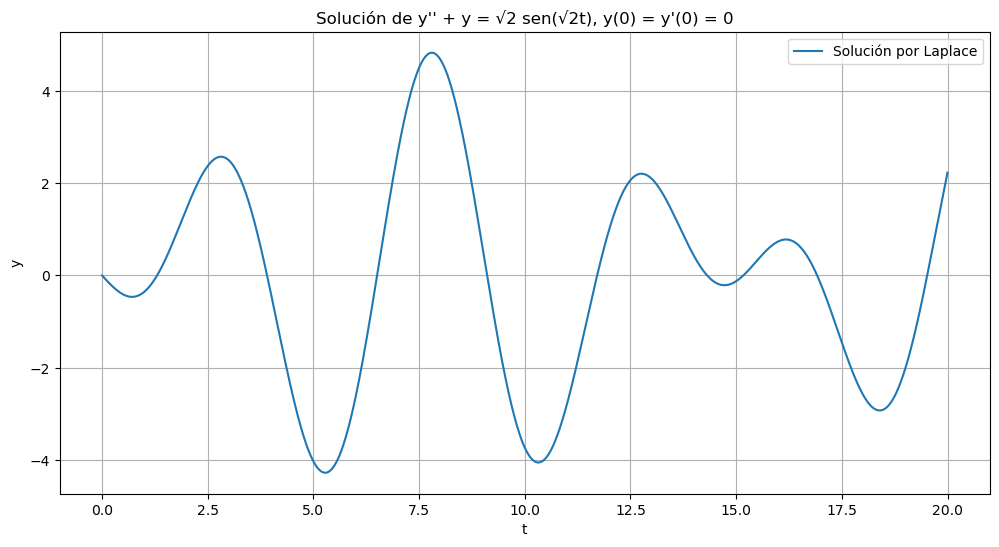

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def laplace_solution(t):
    return np.sqrt(2) * (np.sin(t) - np.sin(np.sqrt(2)*t)) / (2 - np.sqrt(2))

# Generar puntos para graficar
t = np.linspace(0, 20, 1000)

# Calcular solución
y_laplace = laplace_solution(t)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(t, y_laplace, label='Solución por Laplace')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solución de y'' + y = √2 sen(√2t), y(0) = y'(0) = 0")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import sympy as sp

# Definir las variables simbólicas (t como positiva)
s = sp.symbols('s')
t = sp.symbols('t', positive=True)
Y = sp.Function('Y')(s)

# Definir la transformada de Laplace de y''
L_y_double_prime = s**2 * Y - s * sp.sympify(0) - sp.sympify(0)

# Definir la transformada de Laplace de y
L_y = Y

# Definir la transformada de Laplace de √2*sin(√2*t)
L_f = sp.sqrt(2) * (sp.sqrt(2) / (s**2 + 2))

# Formar la ecuación en el dominio de Laplace
laplace_eq = L_y_double_prime + L_y - L_f

# Resolver para Y
Y_solved = sp.solve(laplace_eq, Y)[0]

# Aplicar la transformada inversa de Laplace
y = sp.inverse_laplace_transform(Y_solved, s, t)

# Simplificar la solución
y_simplified = sp.simplify(y)

print("La solución explícita es:")
sp.pprint(y_simplified)

La solución explícita es:
2⋅sin(t) - √2⋅sin(√2⋅t)


In [28]:
import sympy as sp

# Definir la variable simbólica
t, tau = sp.symbols('t tau')

# Definir las funciones f(tau) y g(t - tau)
f_tau = sp.exp(tau)  # f(tau) = exp(tau) para tau >= 0
g_t_tau = (t - tau)**2 # g(t - tau) = (t - tau)**2 para t - tau >= 0

# Definir la convolución explícita
convolucion_integral = sp.integrate(f_tau * g_t_tau, (tau, 0, t))

# Simplificar la expresión resultante
convolucion = sp.simplify(convolucion_integral)

# Mostrar la solución explícita de la convolución
print("La convolución es:")
sp.pprint(convolucion)

La convolución es:
   2            t    
- t  - 2⋅t + 2⋅ℯ  - 2


La solución simbólica es:
(Heaviside(t) - 3*Heaviside(t - pi/2))*cos(t)


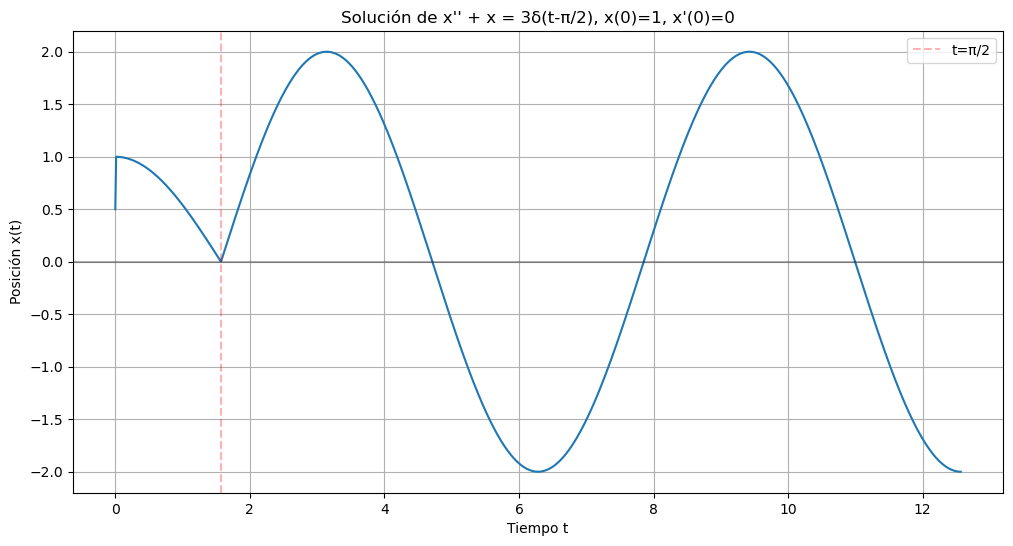

In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import t, s

# Definir variables simbólicas
t = sp.Symbol('t', real=True)
s = sp.Symbol('s')

# Definir las condiciones iniciales
x0 = 1  # x(0)
v0 = 0  # x'(0)

# La transformada de Laplace de la delta de Dirac desplazada δ(t-a) es e^(-as)
a = sp.pi/2  # El desplazamiento de la delta
L_delta = sp.exp(-a*s)  # Transformada de la delta desplazada

# Aplicar la transformada de Laplace a la ecuación. Este cálculo es manual
# L{x''} + L{x} = 3L{δ(t-π/2)}
# s²X(s) - sx(0) - x'(0) + X(s) = 3e^(-πs/2)
# (s² + 1)X(s) = sx₀ + v₀ + 3e^(-πs/2)
# X(s) = (sx₀ + v₀ + 3e^(-πs/2))/(s² + 1)

X_s = (s*x0 + v0 + 3*L_delta)/(s**2 + 1)

# Calcular la transformada inversa
x_t = sp.inverse_laplace_transform(X_s, s, t)

# Simplificar la expresión
x_t = sp.simplify(x_t)

# Convertir la solución simbólica a una función numérica para graficar
x_t_lambda = sp.lambdify(t, x_t, modules=['numpy'])

# Crear puntos para graficar
t_vals = np.linspace(0, 4*np.pi, 1000)
x_vals = x_t_lambda(t_vals)

# Graficar la solución
plt.figure(figsize=(12, 6))
plt.plot(t_vals, x_vals)
plt.grid(True)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x(t)')
plt.title('Solución de x\'\' + x = 3δ(t-π/2), x(0)=1, x\'(0)=0')
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.3, label='t=π/2')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.legend()

# Imprimir la solución simbólica
print("La solución simbólica es:")
print(x_t)
plt.show()

In [30]:
import sympy as sp
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

x = sp.symbols('x')

def serie_EDO(N,a,b,c):
    #   N = Número de términos de la serie
    #   a = Coeficiente de y''
    #   b = Coeficiente de y'
    #   c = Coeficiente de y
    #   Observación: En caso de ingresar una fraccion numérica realizarlo de la
    #                forma: sp.Rational(p,q) donde p=numerador y q=denominador.

    '''Función que calcula N términos de la serie de potencias centrada en 0,
    asociada a la expresión ay''+by'+cy, donde a,b,c son funciones que
    dependen de x.'''

    coef = sp.symbols('c0:' + str(2 * N))
    y = sum([coef[i] * x**i for i in range(2 * N)])
    expr = sp.expand(a * sp.diff(y,x,2) + b * sp.diff(y,x) + c * y)
    co = [expr.coeff(x,i) for i in range(N)]
    serie = sum([co[i] * x**i for i in range(N)])
    return serie

serie_EDO(10,x**2+1,x,-1)

              2                   3                   4                    5  
-c₀ + 2⋅c₂ + x ⋅(3⋅c₂ + 12⋅c₄) + x ⋅(8⋅c₃ + 20⋅c₅) + x ⋅(15⋅c₄ + 30⋅c₆) + x ⋅(

                  6                    7                    8                 
24⋅c₅ + 42⋅c₇) + x ⋅(35⋅c₆ + 56⋅c₈) + x ⋅(48⋅c₇ + 72⋅c₉) + x ⋅(63⋅c₈ + 90⋅c₁₀)

    9                           
 + x ⋅(80⋅c₉ + 110⋅c₁₁) + 6⋅c₃⋅x

EDO a resolver:


  2                          
 d                    ⎛    π⎞
───(x(t)) + x(t) = 3⋅δ⎜t - ─⎟
  2                   ⎝    2⎠
dt                           

Con PVI:


x(0) = 1

x'(0) = 0



Ecuación después de aplicar la transformada de Laplace sin aplicar las condiciones del PVI:


                                                                              
                                                                              
  ⎛d       ⎞│       2                                                         
- ⎜──(x(t))⎟│    + s ⋅LaplaceTransform(x(t), t, s) - s⋅x(0) + LaplaceTransform
  ⎝dt      ⎠│t=0                                                              

                  -π⋅s 
                  ─────
                    2  
(x(t), t, s) = 3⋅ℯ     
                       

Ecuación después de aplicar la transformada de Laplace aplicando las condiciones PVI:


                                                                         -π⋅s 
                                                                         ─────
      2                                                                    2  
-s + s ⋅LaplaceTransform(x(t), t, s) + LaplaceTransform(x(t), t, s) = 3⋅ℯ     

Transformada de Laplace:


                               ⎛       π⋅s⎞  -π⋅s 
                               ⎜       ───⎟  ─────
                               ⎜        2 ⎟    2  
                               ⎝3 + s⋅ℯ   ⎠⋅ℯ     
LaplaceTransform(x(t), t, s) = ───────────────────
                                           2      
                                      1 + s       



La solución simbólica es:


       ⎛     ⎛    π⎞       ⎞       
x(t) = ⎜- 3⋅θ⎜t - ─⎟ + θ(t)⎟⋅cos(t)
       ⎝     ⎝    2⎠       ⎠       

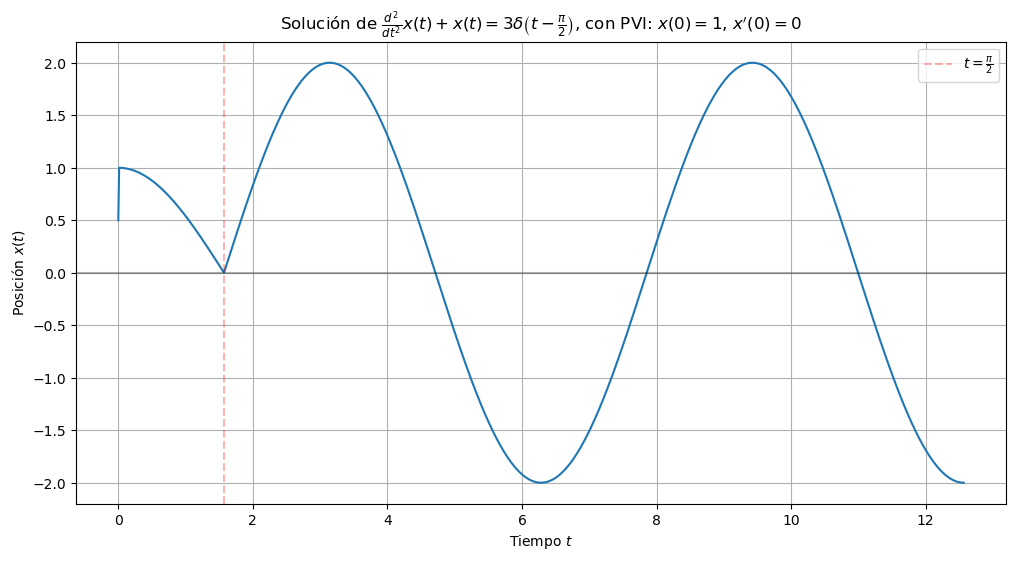

In [31]:
# Importar módulos necesarios
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir variables simbólicas
t = sp.Symbol('t', real = True)
s = sp.Symbol('s')

# Definir función x y sus derivadas
x = sp.Function('x')(t)
dx_dt = x.diff(t)
dx2_dt = dx_dt.diff(t)

# Definir función F que reemplaza a la transformada de Laplace
F = sp.Function('F')(s)

##################################################
#    EDITAR AQUÍ    #
#####################
# Definir el/los desplazamiento(s) de la(s) delta(s)
a = [sp.pi/2]

# Definir la EDO
EDO = sp.Eq(dx2_dt + x, 3*sp.DiracDelta(t - a[0]))

# Definir las condiciones del PVI
x_0 = 1
dx_0 = 0

# Definir intervalo de t para graficar
Valores_t = np.linspace(0, 4*np.pi, 1000)

##################################################

# Definir las ecuaciones para mostrar las condiciones del PVI
x_t_0 = sp.Eq(x.subs(t, 0), x_0)
dx_t_0 = sp.Eq(sp.Symbol("x'(0)"), dx_0)

# Imprimir la EDO a resolver
print('EDO a resolver:')
display(EDO)
print('Con PVI:')
display(x_t_0)
display(dx_t_0)

# Aplicar la transformada de Laplace a la ecuación
# usa directamente la transformada sin intentar acceder al índice
lhs_transform = sp.laplace_transform(EDO.lhs, t, s)
rhs_transform = sp.laplace_transform(EDO.rhs, t, s)

if isinstance(lhs_transform, tuple):
    lhs_transform = lhs_transform[0]
if isinstance(rhs_transform, tuple):
    rhs_transform = rhs_transform[0]

Ecuacion_Laplace = sp.Eq(lhs_transform, rhs_transform)

# Imprimir expresión de la ecuación con transformada de Laplace
print('\n\nEcuación después de aplicar la transformada de Laplace sin aplicar las condiciones del PVI:')
display(Ecuacion_Laplace)

# Aplicar los valores del PVI a la ecuación
Ecuacion_Laplace_PVI = Ecuacion_Laplace.subs({
    sp.LaplaceTransform(x, t, s): F,
    x.subs(t, 0): x_0,
    dx_dt.subs(t, 0): dx_0})

# Imprimir la ecuación con transformada de Laplace considerando las condiciones del PVI
print('Ecuación después de aplicar la transformada de Laplace aplicando las condiciones PVI:')
display(Ecuacion_Laplace_PVI.subs({F: sp.LaplaceTransform(x, t, s)}))

# Resolver por la transformada de Laplace
Solucion_Laplace = sp.solve(Ecuacion_Laplace_PVI, F)[0]

# Imprimir la ecuación de la transformada de Laplace
print('Transformada de Laplace:')
display(sp.Eq(sp.LaplaceTransform(x, t, s), Solucion_Laplace.simplify()))

# Calcular la transformada inversa y simplificar la expresión
Solucion = sp.inverse_laplace_transform(Solucion_Laplace, s, t).doit().simplify()

# Imprimir la solución simbólica
print('\n\nLa solución simbólica es:')
display(sp.Eq(x, Solucion))

# Convertir la solución simbólica a una función numérica para graficar
x_Lambda = sp.lambdify(t, Solucion, modules = ['numpy'])

# Crear puntos para graficar
Valores_x = x_Lambda(Valores_t)

# Graficar la solución
plt.figure(1, (12, 6))
plt.clf()
plt.plot(Valores_t, Valores_x)
plt.grid(True)
plt.title(f'Solución de ${sp.latex(EDO)}$, con PVI: ${sp.latex(x_t_0)}$, ${sp.latex(dx_t_0)}$')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición $x(t)$')
[plt.axvline(_a, color = 'r', linestyle = '--', alpha = 0.3, label = f'$t={sp.latex(_a)}$') for _a in a]
plt.axhline(0, color = 'k', linestyle = '-', alpha = 0.3)
plt.legend()
plt.show()

### Gracias a Alonso Tamayo por su amable colaboración.

In [32]:
import sympy as sp

# Definimos los símbolos y parámetros
x = sp.symbols('x')
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

# Función para calcular la solución en términos de solo c0 y c1
def calcular_solucion_en_terminos_de_c0_c1(N, a, b, c):
    # Definimos los coeficientes de la serie de potencias
    coef = sp.symbols('c0:' + str(2 * N))
    y = sum([coef[i] * x**i for i in range(2 * N)])
    # Expandimos la expresión de la EDO
    expr = sp.expand(a * sp.diff(y, x, 2) + b * sp.diff(y, x) + c * y)
    # Obtenemos los coeficientes de x^i
    co = [expr.coeff(x, i) for i in range(N)]
    
    # Calculamos la relación de recurrencia
    relacion_recurrencia = []
    for i in range(len(co)):
        # Resolviendo cada ecuación en función de coeficientes c_i
        eq = sp.Eq(co[i], 0)
        solucion = sp.solve(eq, coef[i + 2])  # Relación en términos de coeficientes previos
        relacion_recurrencia.append((coef[i + 2], solucion[0]) if solucion else (coef[i + 2], 0))
    
    # Expresamos los coeficientes solo en función de c0 y c1
    c0, c1 = sp.symbols('c0 c1')
    coef_valores = {coef[0]: c0, coef[1]: c1}
    for i, (ci, valor) in enumerate(relacion_recurrencia):
        if valor != 0:
            # Sustituimos cada coeficiente en términos de c0 y c1
            coef_valores[ci] = valor.subs(coef_valores)
        else:
            coef_valores[ci] = 0
    
    # Construimos la solución en términos de c0 y c1
    y_solucion = sum(coef_valores[coef[i]] * x**i for i in range(N))
    
    return relacion_recurrencia, y_solucion.simplify()

# Ejecutamos el cálculo con N=10, a=1, b=0, c=x ### Acá se introducen los parámetros
relacion_recurrencia, y_solucion = calcular_solucion_en_terminos_de_c0_c1(10, 1, 0, x) 
y_solucion


                3       4       6       7       9
            c₀⋅x    c₁⋅x    c₀⋅x    c₁⋅x    c₀⋅x 
c₀ + c₁⋅x - ───── - ───── + ───── + ───── - ─────
              6       12     180     504    12960

In [33]:
import sympy as sp
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

x = sp.symbols('x')

def serie_frobenius(N,a,b,c,r):

    # N = Número de términos de la serie
    # a = Coeficiente de y''
    # b = Coeficiente de y'
    # c = Coeficiente de y
    # r = Raíz indicial (evaluar por la raíz obtenida al resolver
    #     la ecuación indicial)
    # Observación: En caso de ingresar una fracción numérica realizarlo de la
    #              forma:sp.Rational(p,q) donde p=numerador y q=denominador.

    '''Función que calcula N términos de la serie de potencias centrada en 0, 
    asociada a la expresión ay''+by'+cy, donde a,b,c son funciones que 
    dependen de x, de acuerdo a solución 'y' dada por el Teorema de Frobenius.'''

    coef = sp.symbols('c0:'+str(2 * N))
    y = sum([coef[i] * x**(i + r) for i in range(2 * N)])
    expr = sp.expand(sp.cancel(sp.expand(a * sp.diff(y,x,2) + b * sp.diff(y,x) +
                                         c * y)/x**r))
    co = [expr.coeff(x,i-1) for i in range(N+1)]
    serie = x**r*(coef[0]+sum([(co[i])*x**(i) for i in range(N+1)]))
    return serie

serie_frobenius(10,2*x,-1,2,sp.Rational(3,2))

 3/2 ⎛                        2                   3                   4       
x   ⋅⎝c₀ + x⋅(2⋅c₀ + 5⋅c₁) + x ⋅(2⋅c₁ + 14⋅c₂) + x ⋅(2⋅c₂ + 27⋅c₃) + x ⋅(2⋅c₃ 

            5                   6                   7                    8    
+ 44⋅c₄) + x ⋅(2⋅c₄ + 65⋅c₅) + x ⋅(2⋅c₅ + 90⋅c₆) + x ⋅(2⋅c₆ + 119⋅c₇) + x ⋅(2⋅

                9                    10                 ⎞
c₇ + 152⋅c₈) + x ⋅(2⋅c₈ + 189⋅c₉) + x  ⋅(2⋅c₉ + 230⋅c₁₀)⎠

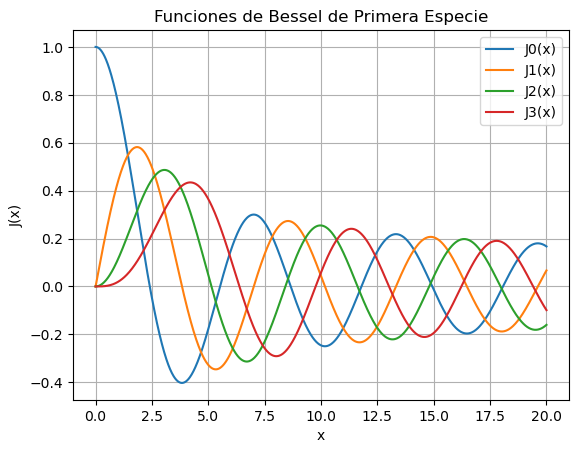

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Definir valores de x para el gráfico
x = np.linspace(0, 20, 1000)

# Una lista de funciones de Bessel de 1ra especie
y = [jv(n, x) for n in range(4)]

# Gráfico
for i, yi in enumerate(y):
    plt.plot(x, yi, label='J{}(x)'.format(i))
plt.xlabel('x')
plt.ylabel('J(x)')
plt.title('Funciones de Bessel de Primera Especie')
plt.legend()
plt.grid(True)
plt.show()

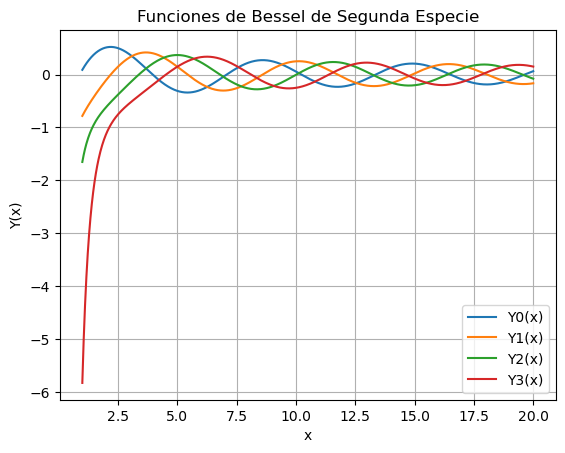

In [35]:
from scipy.special import yn

# Se puede cambiar yn por yv para órdenes fraccionarios
# al importar yv  

# Definir valores de x para el gráfico
x = np.linspace(1, 20, 1000)

# Una lista de funciones de Bessel de 2da especie
y = [yn(n, x) for n in range(4)]

# Gráfico
for i, yi in enumerate(y):
    plt.plot(x, yi, label='Y{}(x)'.format(i))
plt.xlabel('x')
plt.ylabel('Y(x)')
plt.title('Funciones de Bessel de Segunda Especie')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
import sympy as sp

def fourier_series(f, p, n_terms=10):
    """
    Calcula el desarrollo en serie de Fourier de una función `f(x)` definida en el intervalo ]-p, p[.

    Args:
        f (sympy expression): La función a desarrollar.
        p (float): El intervalo del desarrollo ]-p, p[.
        n_terms (int): Número de términos de la serie de Fourier.

    Returns:
        sympy expression: La serie de Fourier como una expresión simbólica.
    """
    # Definir la variable simbólica
    x = sp.Symbol('x', real=True)
    
    # Coeficiente a_0
    a0 = (1 / (2 * p)) * sp.integrate(f, (x, -p, p))

    # Coeficientes a_n y b_n
    a_n = lambda n: (1 / p) * sp.integrate(f * sp.cos(n * sp.pi * x / p), (x, -p, p))
    b_n = lambda n: (1 / p) * sp.integrate(f * sp.sin(n * sp.pi * x / p), (x, -p, p))

    # Construir la serie de Fourier
    series = a0 / 2
    for n in range(1, n_terms + 1):
        series += a_n(n) * sp.cos(n * sp.pi * x / p) + b_n(n) * sp.sin(n * sp.pi * x / p)

    # Simplificar la serie
    series = sp.simplify(series)
    return series


In [37]:
# Definir la función f(x) y el intervalo
x = sp.Symbol('x', real=True)
f = x**2 # Función f(x) a desarrollar
p = sp.pi  # Intervalo ]-p, p[

# Llamar a la función para calcular la serie de Fourier
n_terms = 10  # Número de términos de la serie
series = fourier_series(f, p, n_terms)

# Mostrar la serie
display(series)

                                                                              
            4⋅cos(3⋅x)   4⋅cos(5⋅x)   4⋅cos(7⋅x)   4⋅cos(9⋅x)   cos(4⋅x)   cos
-4⋅cos(x) - ────────── - ────────── - ────────── - ────────── + ──────── + ───
                9            25           49           81          4          

                                           2
(6⋅x)   cos(8⋅x)   cos(10⋅x)              π 
───── + ──────── + ───────── + cos(2⋅x) + ──
9          16          25                 6 

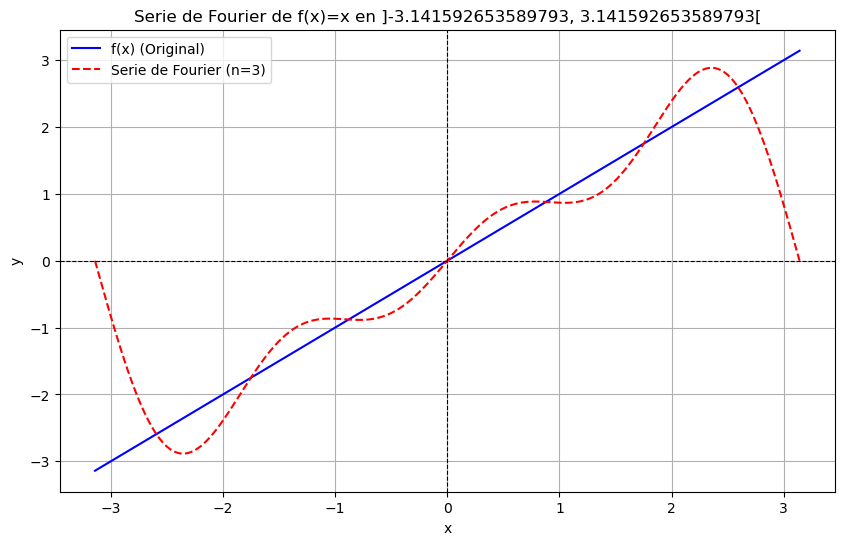

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def plot_fourier(f, p, n_terms=10, num_points=1000):
    """
    Grafica la función original `f(x)` y su desarrollo en serie de Fourier en el intervalo ]-p, p[.

    Args:
        f (sympy expression): La función a desarrollar.
        p (float or sympy expression): El intervalo del desarrollo ]-p, p[.
        n_terms (int): Número de términos de la serie de Fourier.
        num_points (int): Número de puntos para la gráfica.
    """
    # Variables simbólicas
    x = sp.Symbol('x', real=True)
    
    # Calcular la serie de Fourier
    series = fourier_series(f, p, n_terms)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    f_numeric = sp.lambdify(x, f, modules=["numpy"])
    series_numeric = sp.lambdify(x, series, modules=["numpy"])
    
    # Convertir p a un número si es simbólico
    p_numeric = float(p) if isinstance(p, sp.Basic) else p
    
    # Crear puntos para graficar
    x_vals = np.linspace(-p_numeric, p_numeric, num_points)
    f_vals = f_numeric(x_vals)
    series_vals = series_numeric(x_vals)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, label='f(x) (Original)', color='blue')
    plt.plot(x_vals, series_vals, label=f'Serie de Fourier (n={n_terms})', color='red', linestyle='--')
    plt.title(f'Serie de Fourier de f(x)={f} en ]-{p_numeric}, {p_numeric}[')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso
x = sp.Symbol('x', real=True)
f = x  # Función original
p = np.pi  # Intervalo ]-p, p[
n_terms = 3  # Número de términos en la serie de Fourier

plot_fourier(f, p, n_terms)

In [39]:
import ipywidgets as widgets

widgets.IntSlider()

IntSlider(value=0)

In [40]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [41]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
pio.renderers.default = 'iframe'

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()